##  Procedure

1)  Choose initial guess for the root<br>
2)  Calculate derivative at that point<br>
3)  Using the equation of the tangent line, calculate the x-intercept<br>
4)  Repeat process using the x intercept as the new guess for the root<br>
5)  Iterate until desired tolerance is reached<br>

Our test function will be,

$$y = (x - 1)^3 + 5.$$

Its derivative is,
$$y^\prime = 3(x-1)^2$$

We code these function in the cell below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [2]:
def cubic(x, args = []):
    return np.power(x - 1, 3) + 5

def cubic_derivative(x, args = []):
    return 3 * np.power(x - 1, 2)

def tangent_line(m, x0, y0, length = 1):
    x = np.linspace(x0 - length / 2, x0 + length / 2)
    y = m * (x - x0) + y0
    return x, y

def newtons_method(f, fprime, R = 0, max_iter = 1000, tol=1e-3, args = [], debug = False):
    count = 0
    epsilon = 1
    
    while epsilon >= tol:
        count += 1
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)
        
        old_R = R
        
        function_value = f(R, args = args)
        function_derivative = fprime(R, args = args)
        
               
        R = -function_value / function_derivative + R
        
        epsilon = np.abs( (R - old_R) / old_R)
        if debug == True:
            print('Iteration = ', count, 'f = ', function_value, 'fprime = ', function_derivative, 'Tol = ', epsilon)
        
    return R, count

##  Cubic Equation
###  Manual Iteration

Estimated root =  -0.722001880058607


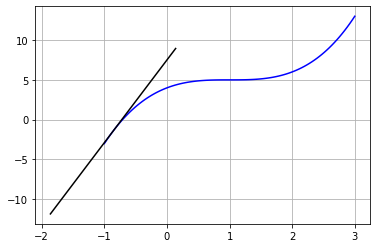

In [3]:
x = np.linspace(-1, 3, 100)
y = cubic(x)

plt.plot(x, y, 'b')
plt.grid(True)

x0 = -0.8616780045351473; y0 = cubic(x0)
yprime = cubic_derivative(x0); # print(yprime)

u, v = tangent_line(yprime, x0, y0, length = 2)
plt.plot(u, v, 'k')

x0 = -y0 / yprime + x0; print('Estimated root = ', x0)

##  Cubic Equation
###  Solved using function - Initial guess = 2
Initial guess causes the updated root to be zero which cuases a tolerence of Inf on the second iteration.

Iteration =  1 f =  6 fprime =  3 Tol =  1.0
Iteration =  2 f =  4.0 fprime =  3.0 Tol =  inf
Iteration =  3 f =  -7.703703703703699 fprime =  16.33333333333333 Tol =  0.3537414965986393
Iteration =  4 f =  -1.452287389795793 fprime =  10.397534977709906 Tol =  0.1620978181425115
Iteration =  5 f =  -0.10623577274137919 fprime =  8.895871424776132 Tol =  0.016540321830385098
Iteration =  6 f =  -0.0007350456851842324 fprime =  8.772912908224406 Tol =  0.000117998266605976
-0.709975950782189 6
Estimated root =  0.0


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


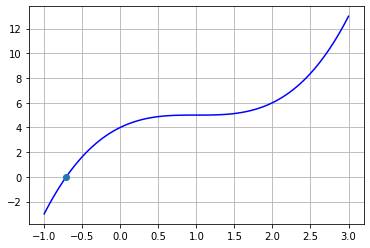

In [4]:
R, count = newtons_method(cubic, cubic_derivative, R = 2, debug = True)
print(R, count)

x = np.linspace(-1, 3, 100)
y = cubic(x)

plt.plot(x, y, 'b')
plt.plot(R, cubic(R), 'o')
plt.grid(True)

x0 = 2; y0 = cubic(x0)
yprime = cubic_derivative(x0); # print(yprime)
x0 = -y0 / yprime + x0; print('Estimated root = ', x0)

###  Solved using function - Initial guess = 3
Works perfectly!

-0.7099759467519977 6


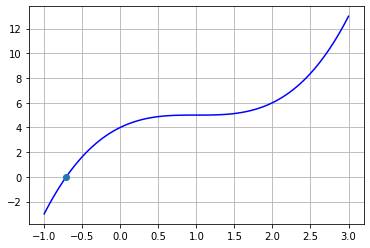

In [5]:
R, count = newtons_method(cubic, cubic_derivative, R = 3)
print(R, count)

x = np.linspace(-1, 3, 100)
y = cubic(x)

plt.plot(x, y, 'b')
plt.plot(R, cubic(R), 'o')
plt.grid(True)

###  Solved using function - Initial guess = 1
1) Zero derivative on the first iteration causes a divide by zero error on the root update step.<br>
2) Also causes the telerance check to return Inf.<br>
3) Since the root doesn't update, we eventually get a tolerance value of Inf / INF which causes the <br>nan.

Iteration =  1 f =  5 fprime =  0 Tol =  inf
Iteration =  2 f =  -inf fprime =  inf Tol =  nan
nan 2


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in int_scalars
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


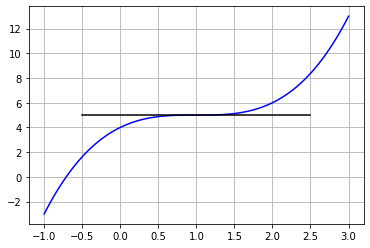

In [6]:
R, count = newtons_method(cubic, cubic_derivative, R = 1, debug = True)
print(R, count)

x = np.linspace(-1, 3, 100)
y = cubic(x)

u, v = tangent_line(cubic_derivative(1), 1, cubic(1), length = 3)

plt.plot(x, y, 'b')
plt.plot(R, cubic(R), 'o')
plt.plot(u, v, 'k')
plt.grid(True)

###  Solved using function - Initial guess = 0
1)  Intial guess of zero causes the tolerance check to give Inf.  This doesn't cause a crash, but throws a warning

C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


Iteration =  1 f =  4 fprime =  3 Tol =  inf
Iteration =  2 f =  -7.703703703703699 fprime =  16.33333333333333 Tol =  0.3537414965986393
Iteration =  3 f =  -1.452287389795793 fprime =  10.397534977709906 Tol =  0.1620978181425115
Iteration =  4 f =  -0.10623577274137919 fprime =  8.895871424776132 Tol =  0.016540321830385098
Iteration =  5 f =  -0.0007350456851842324 fprime =  8.772912908224406 Tol =  0.000117998266605976
-0.709975950782189 5


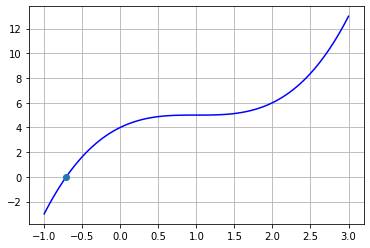

In [7]:
R, count = newtons_method(cubic, cubic_derivative, R = 0, debug = True)
print(R, count)

x = np.linspace(-1, 3, 100)
y = cubic(x)

plt.plot(x, y, 'b')
plt.plot(R, cubic(R), 'o')
plt.grid(True)

##  Quadratic Equation

Which root is found depends on the choice of the initial guess.  Also, it is possible to fail if one of the test roots is zero leading to a zero derivative.

(-3.000000001396984, 4)


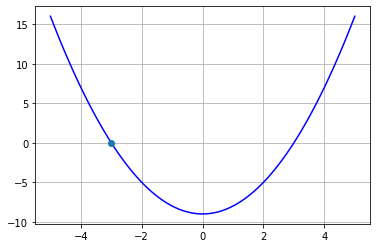

In [8]:
def quadratic(x, args = []):
    return np.power(x, 2) - 9

def quadratic_derivative(x, args = []):
    return 2 * x

x = np.linspace(-5, 5, 100)
plt.plot(x, quadratic(x), 'b')
plt.grid(True)


R = newtons_method(quadratic, quadratic_derivative, R = -5)
plt.plot(R[0], quadratic(R[0]), 'o')

print( newtons_method(quadratic, quadratic_derivative, R = -5))

## Trig function:  $y = \tan(x)$
Functions with singularities can cause problems, though in this case, the root at zero causes a problem with tolerance check.

In [9]:
def tangent(x, args = []):
    return np.tan(x)

def tangent_derivative(x, args = []):
    return np.power(1 / np.cos(x), 2)

Iteration =  1 f =  1.633123935319537e+16 fprime =  2.6670937881135714e+32 Tol =  0.0
(1.5707963267948966, 1)
1.633123935319537e+16


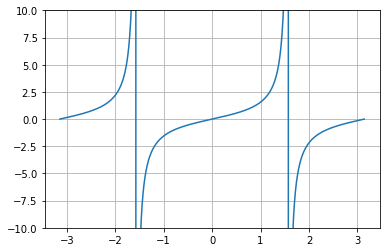

In [10]:
x = np.linspace(-np.pi, np.pi, 1000)

R = newtons_method(tangent, tangent_derivative, R = np.pi/2, debug = True)
print(R)

plt.plot(x, tangent(x))
plt.ylim( [-10, 10])
plt.grid(True)
plt.plot(R[0], tangent(R[0]), 'o')
print(tangent(R[0]))

##  Equations with no roots

In [11]:
def new_quadratic(x, args = []):
    return np.power(x, 2) + 9

def new_quadratic_derivative(x, args = []):
    return 2 * x

x = np.linspace(-3, 3, 100)
plt.plot(x, new_quadratic(x), 'b')
plt.ylim([0, 20])
plt.grid(True)
R = newtons_method(new_quadratic, new_quadratic_derivative, R = 2)
print(R)

The Black-Scholes price of a call is given by,
$$C = \Phi(d_1) S - \Phi(d_2) K e^{-r t},$$
and the price of a put by,
$$P = \Phi(-d_2)e_{-rt} - \Phi(-d_1)S,$$
where
$$d_1 = \frac{1}{\sigma \sqrt{t}} \left[ \ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma.^2}{2}\right) t\right],$$
and
$$d_2 = d_1 - \sigma \sqrt{t}.$$

If a price of an option, say a call is $C_0$, we can write an equation,
$$C(\sigma) - C_0 = 0.$$

In [12]:
def call_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    C = np.multiply(S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * t))
    return C

def put_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    P = -np.multiply(S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * t))
    return P

def objective_function(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    price = args[4]
    
    return call_price(sigma, S, K, r, t) - price

def calculate_vega(sigma, args):
    S = args[0]
    K = args[1]
    r = args[2]
    t = args[3]
    
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    
    return S * norm.pdf(d1) * np.sqrt(t)

##  Test Case

In [13]:
S = 100.0
K = 105.0
t = 30.0 / 365.0
r = 0.01
C0 =2.30

args = [S, K, r, t, C0]

R, count = newtons_method(objective_function, calculate_vega, R = 0.50, args = args)
print(R)

0.36885632491434034


Text(0, 0.5, 'Call Price ($)')

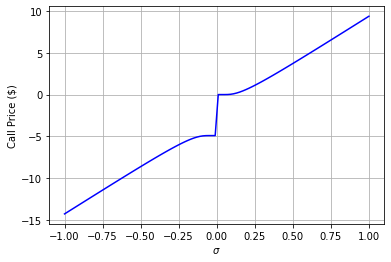

In [14]:
sigma = np.linspace(-1, 1, 100)
plt.plot(sigma, call_price(sigma, S, K, r, t), 'b')
plt.grid(True)
plt.xlabel('$\sigma$')
plt.ylabel('Call Price ($)')

##  Case #1:  ITM option with price less than intrinsic value

Iteration =  1 f =  9.582954768952586 fprime =  8.22247040911514 Tol =  2.330918639325053
Iteration =  2 f =  -5.564983695244442 fprime =  9.247541175990328 Tol =  0.9043074543582396
Iteration =  3 f =  -2.300000000849465 fprime =  4.892923782027778e-07 Tol =  73817573.61221953
Iteration =  4 f =  97.7 fprime =  0.0 Tol =  inf
Iteration =  5 f =  nan fprime =  nan Tol =  nan
nan 5


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply
C:\Users\moone\Anaconda3\lib\site-packages\

Text(0, 0.5, 'Call Price ($)')

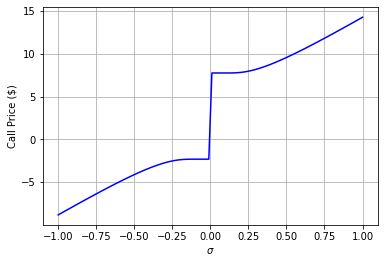

In [15]:
S = 100.0
K = 90.0
t = 30.0 / 365.0
r = 0.01
C0 = 2.30

args = [S, K, r, t, C0]

R, count = newtons_method(objective_function, calculate_vega, R = 0.50, args = args, debug = True)
print(R, count)

sigma = np.linspace(-1, 1, 100)
plt.plot(sigma, call_price(sigma, S, K, r, t) - C0, 'b')
plt.grid(True)
plt.xlabel('$\sigma$')
plt.ylabel('Call Price ($)')

##  Case 2:  Short time to expiration while far from the money

Iteration =  1 f =  -0.3 fprime =  4.459492577833074e-32 Tol =  1.34544455345085e+31
Iteration =  2 f =  99.7 fprime =  0.0 Tol =  inf
Iteration =  3 f =  nan fprime =  nan Tol =  nan
nan 3


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\moone\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply
C:\Users\moone\Anaconda3\lib\site-packages\

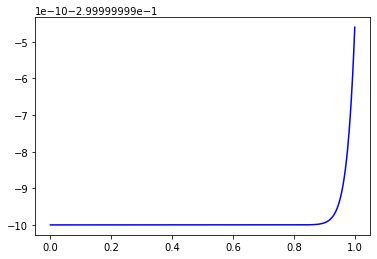

In [54]:
S = 100.0
K = 125.0
t = 0.5 / 365.0
r = 0.01
C0 =0.30

args = [S, K, r, t, C0]
R, count = newtons_method(objective_function, calculate_vega, R = 0.50, args = args, debug = True)
print(R, count)

sigma = np.linspace(0, 1, 1000)
plt.plot(sigma, call_price(sigma, S, K, r, t) - C0, 'b')

##  Case 3:  Root is close to discontinuity

Iteration =  1 f =  5.50939075282634 fprime =  11.426940204026605 Tol =  0.9642810156449318
Iteration =  2 f =  0.05021442610979832 fprime =  8.231846668546398 Tol =  0.3415561624030527
Iteration =  3 f =  0.007610470182665594 fprime =  5.342047648076189 Tol =  0.12114789935582639
Iteration =  4 f =  0.0007457775531161202 fprime =  4.265889028726169 Tol =  0.016915939197181862
Iteration =  5 f =  1.2539434222311532e-05 fprime =  4.122031824971013 Tol =  0.0002994141411406711
0.010156971638976725 5


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


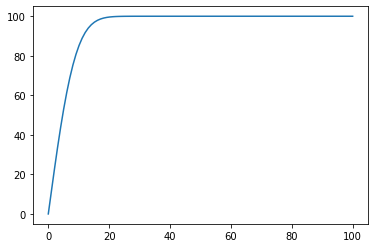

In [59]:
S = 100.0
K = 100.5
t = 30.0 / 365.0
r = 0.01
C0 = 0.01

args = [S, K, r, t, C0]

R, count = newtons_method(objective_function, calculate_vega, R = 0.5, args = args, debug = True)
print(R, count)

sigma = np.linspace(0, 100, 100)
plt.plot(sigma, call_price(sigma, S, K, r, t) - C0, '-')